<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/Girar%20texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ângulo detectado: -13.00 graus


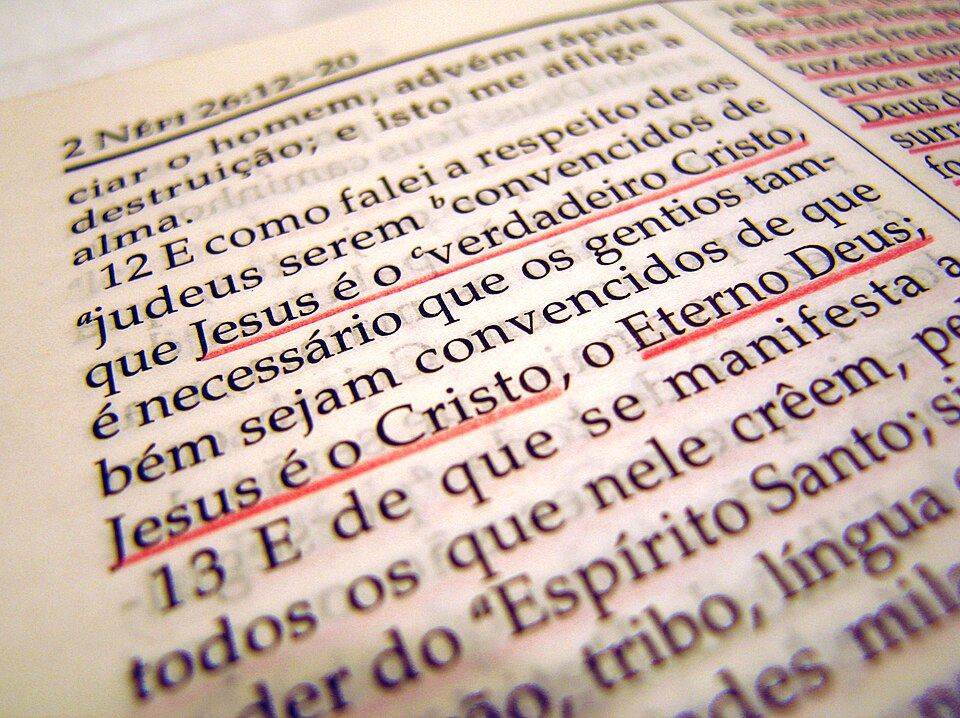

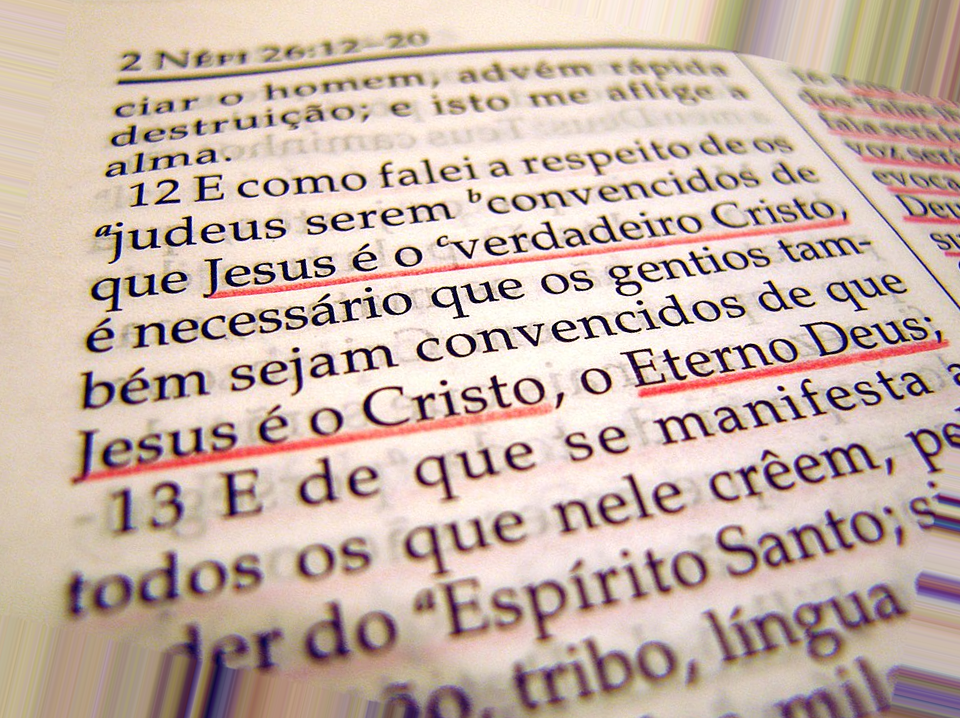

In [78]:
import cv2  # Biblioteca OpenCV, usada para processamento de imagens
import numpy as np  # Biblioteca NumPy, usada para operações numéricas e arrays
from google.colab.patches import cv2_imshow  # Função para exibir imagens no Google Colab

# Carrega a imagem do diretório atual
imagem = cv2.imread("texto 2.jpg")

# Converte a imagem colorida para escala de cinza (necessário para facilitar o processamento)
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplica binarização adaptativa:
# - Converte para preto e branco com base em médias locais da vizinhança
# - Usa inversão (pixels claros viram escuros e vice-versa)
# - Os valores 15 e 10 ajustam o tamanho do bloco e a constante subtraída da média local
binarizada = cv2.adaptiveThreshold(cinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)

# Detecta as bordas da imagem usando o algoritmo de Canny
# Os valores 50 e 150 são os limiares inferior e superior para detectar as bordas
bordas = cv2.Canny(binarizada, 50, 150)

# Aplica a Transformada de Hough para detectar linhas retas na imagem de bordas
# - 1 é a resolução do parâmetro rho
# - np.pi / 180 é a resolução do parâmetro theta (em radianos)
# - 120 é o número mínimo de interseções no acumulador para considerar uma linha
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, 150)

# Inicializa uma lista para armazenar os ângulos das linhas detectadas
angulos = []

# Para cada linha detectada, calcula o ângulo correspondente
for linha in linhas:
    rho, theta = linha[0]  # rho: distância da origem, theta: ângulo da linha
    angulo = (theta * 180 / np.pi)-140 # Converte o ângulo de radianos para graus e ajusta para -140 a +140
    if -45 < angulo < 45:  # Filtra linhas quase horizontais (descarta linhas muito verticais)
        angulos.append(angulo)

# Calcula o ângulo médio entre todas as linhas quase horizontais detectadas
angulo_medio = np.median(angulos)

# Obtém o centro da imagem para aplicar a rotação
(h, w) = imagem.shape[:2]
centro = (w // 2, h // 2)

# Cria a matriz de rotação com o ângulo médio calculado
# O valor 1.0 indica que o tamanho da imagem será mantido
matriz = cv2.getRotationMatrix2D(centro, angulo_medio, 1.0)

# Aplica a rotação à imagem original usando a matriz de rotação
# INTER_CUBIC: método de interpolação para suavizar a imagem rotacionada
# BORDER_REPLICATE: preenche as bordas com os pixels mais próximos
corrigida = cv2.warpAffine(imagem, matriz, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Exibe o ângulo detectado e as imagens original e corrigida
print(f"Ângulo detectado: {angulo_medio:.2f} graus")
cv2_imshow(imagem)
cv2_imshow(corrigida)


Ângulo detectado: -27.00 graus


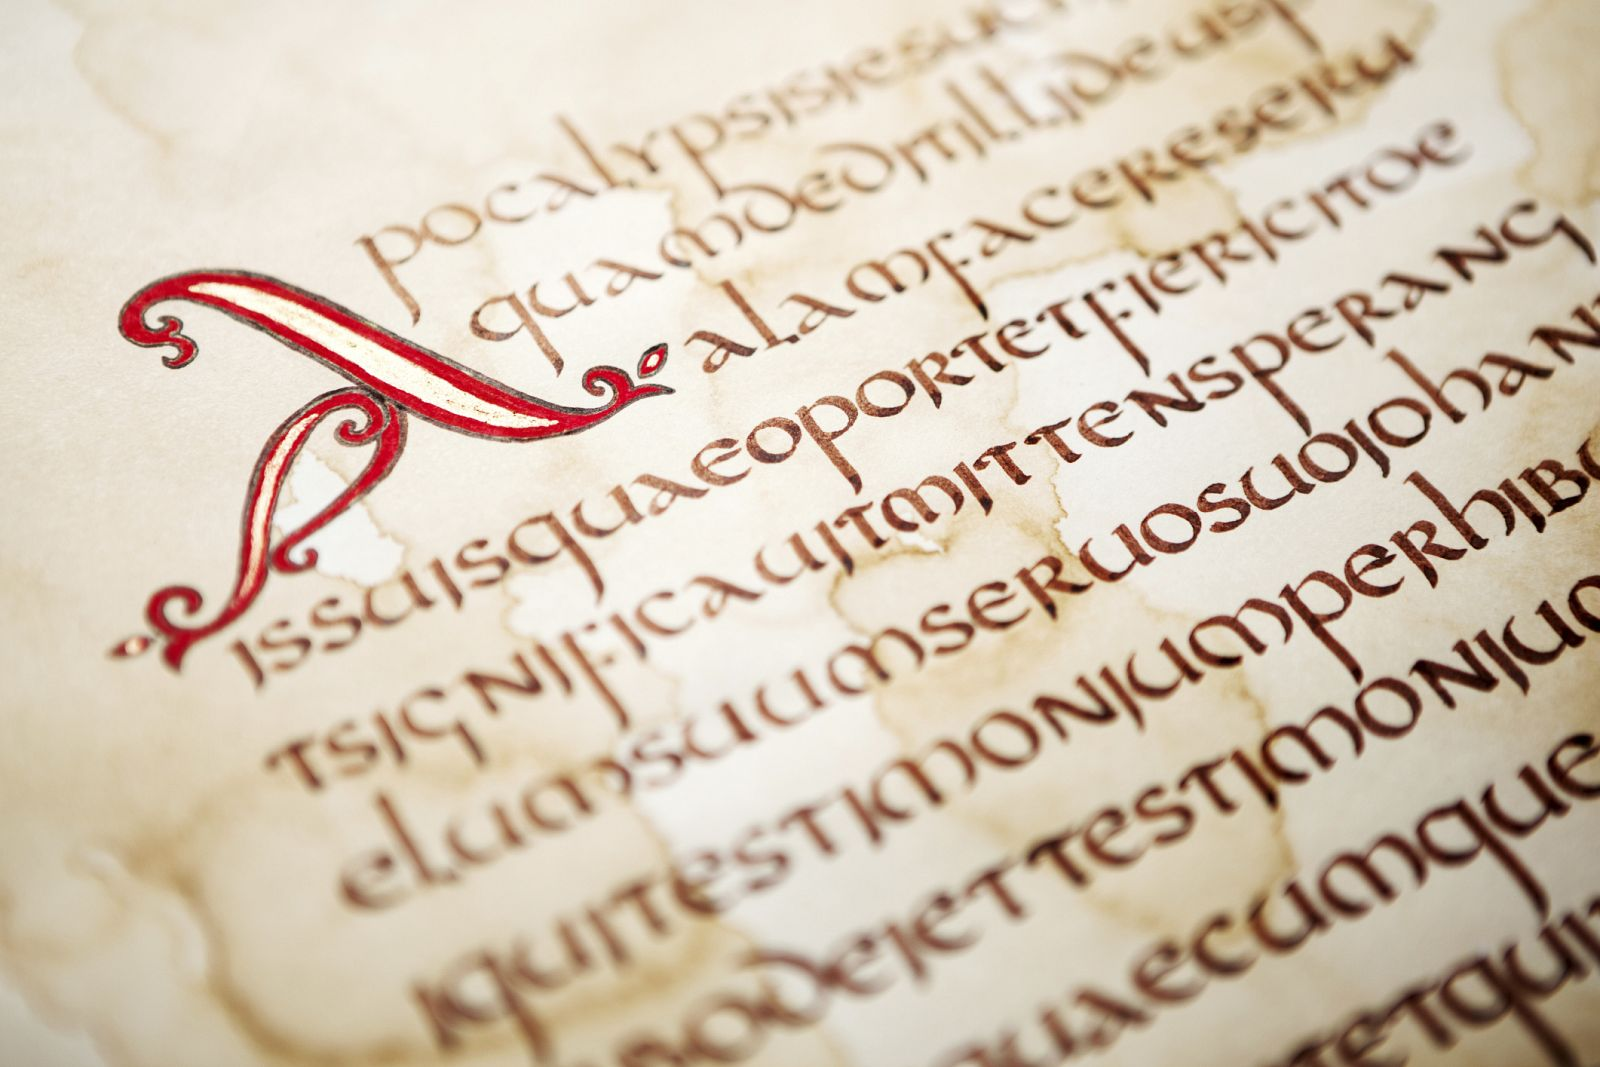

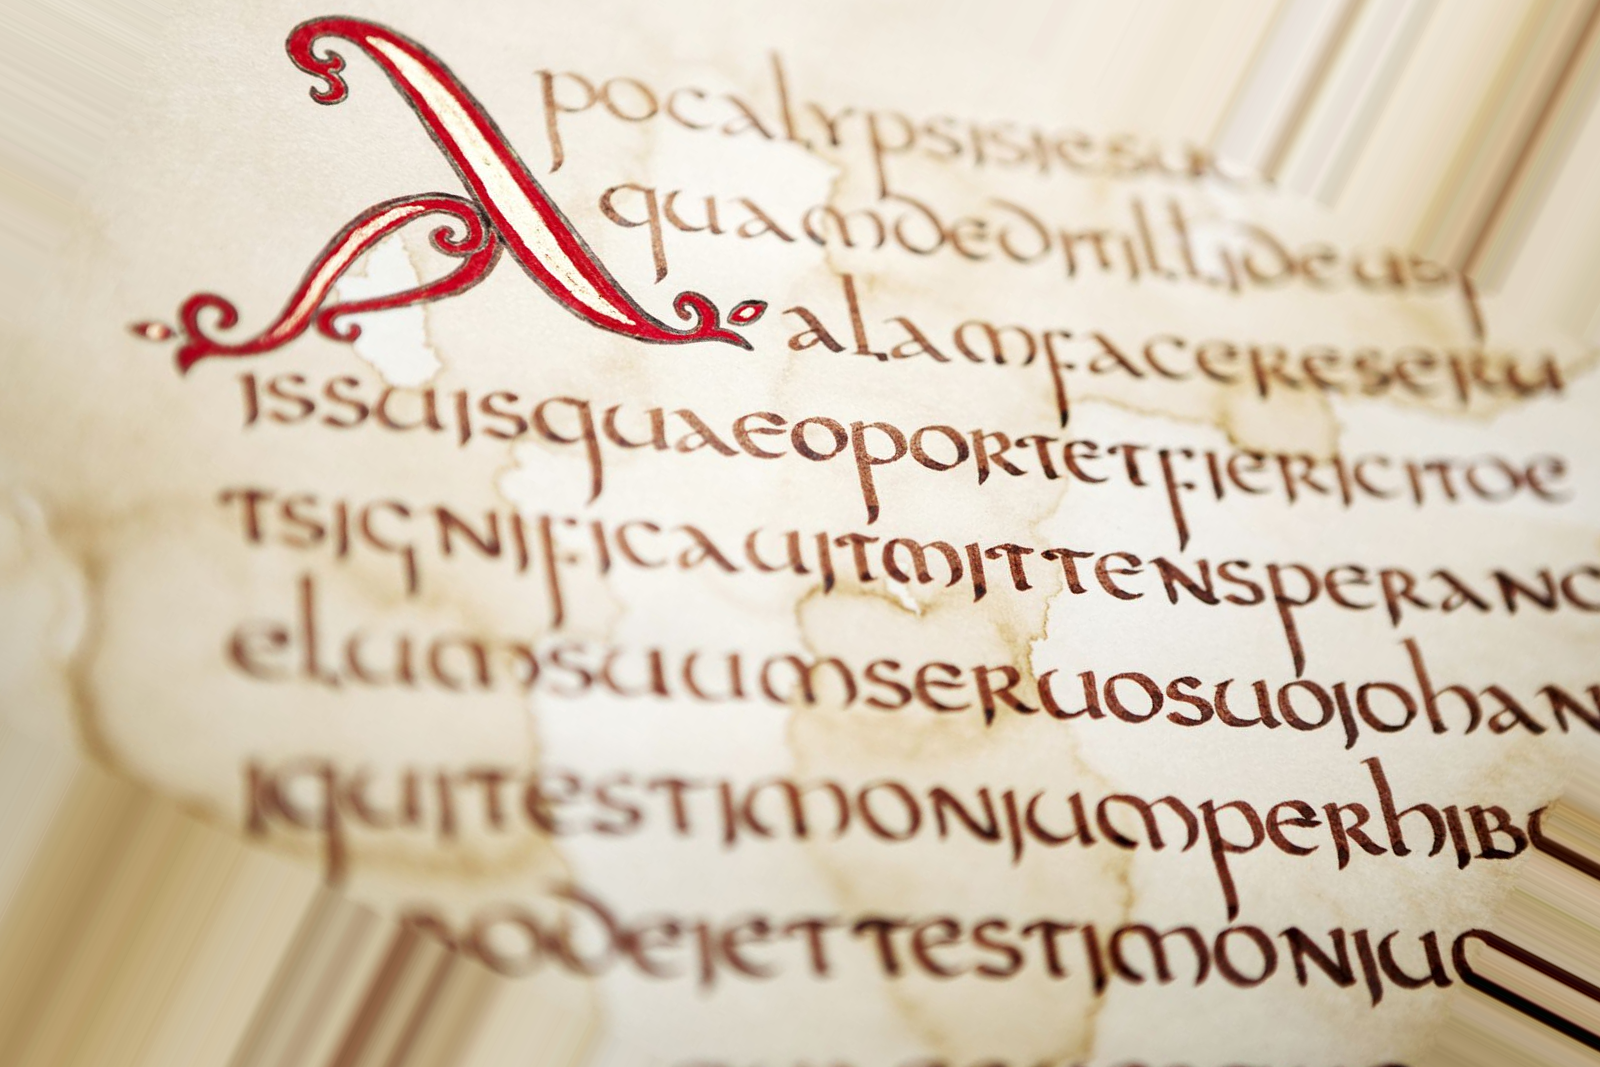

In [77]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carrega a imagem
imagem = cv2.imread("texto 2.jpg")

# Converte para escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplica binarização adaptativa invertida
binarizada = cv2.adaptiveThreshold(cinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)

import cv2  # Biblioteca OpenCV, usada para processamento de imagens
import numpy as np  # Biblioteca NumPy, usada para operações numéricas e arrays
from google.colab.patches import cv2_imshow  # Função para exibir imagens no Google Colab

# Carrega a imagem do diretório atual
imagem = cv2.imread("texto.jpeg")

# Converte a imagem colorida para escala de cinza (necessário para facilitar o processamento)
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplica binarização adaptativa:
# - Converte para preto e branco com base em médias locais da vizinhança
# - Usa inversão (pixels claros viram escuros e vice-versa)
# - Os valores 15 e 10 ajustam o tamanho do bloco e a constante subtraída da média local
binarizada = cv2.adaptiveThreshold(cinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)

# Detecta as bordas da imagem usando o algoritmo de Canny
# Os valores 50 e 150 são os limiares inferior e superior para detectar as bordas
bordas = cv2.Canny(binarizada, 50, 150)

# Aplica a Transformada de Hough para detectar linhas retas na imagem de bordas
# - 1 é a resolução do parâmetro rho
# - np.pi / 180 é a resolução do parâmetro theta (em radianos)
# - 120 é o número mínimo de interseções no acumulador para considerar uma linha
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, 150)

# Inicializa uma lista para armazenar os ângulos das linhas detectadas
angulos = []

# Para cada linha detectada, calcula o ângulo correspondente
for linha in linhas:
    rho, theta = linha[0]  # rho: distância da origem, theta: ângulo da linha
    angulo = (theta * 180 / np.pi)-140 # Converte o ângulo de radianos para graus e ajusta para -140 a +140
    if -45 < angulo < 45:  # Filtra linhas quase horizontais (descarta linhas muito verticais)
        angulos.append(angulo)

# Calcula o ângulo médio entre todas as linhas quase horizontais detectadas
angulo_medio = np.median(angulos)

# Obtém o centro da imagem para aplicar a rotação
(h, w) = imagem.shape[:2]
centro = (w // 2, h // 2)

# Cria a matriz de rotação com o ângulo médio calculado
# O valor 1.0 indica que o tamanho da imagem será mantido
matriz = cv2.getRotationMatrix2D(centro, angulo_medio, 1.0)

# Aplica a rotação à imagem original usando a matriz de rotação
# INTER_CUBIC: método de interpolação para suavizar a imagem rotacionada
# BORDER_REPLICATE: preenche as bordas com os pixels mais próximos
corrigida = cv2.warpAffine(imagem, matriz, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Exibe o ângulo detectado e as imagens original e corrigida
print(f"Ângulo detectado: {angulo_medio:.2f} graus")
cv2_imshow(imagem)
cv2_imshow(corrigida)
